In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

In [2]:
warnings.filterwarnings("ignore")
%matplotlib inline

#### Reading Data ---------------------------------

In [3]:
os.getcwd()

'C:\\Users\\s56823'

In [4]:
os.chdir("D:\\Varun\\Analytics Practice\\Practice Project 3_Big Mart_Advanced Regression\\Data")

In [5]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [6]:
train.shape

(8523, 12)

In [7]:
test.shape

(5681, 11)

In [95]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [96]:
test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [97]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [52]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [8]:
##Consolidating data for EDA
np.min(train['Item_Outlet_Sales'])
np.max(train['Item_Outlet_Sales'])

bmart=train.append(test)

In [9]:
bmart.shape

(14204, 12)

In [56]:
bmart.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [10]:
df=pd.concat([train.isnull().sum(),test.isnull().sum(),bmart.isnull().sum()],axis="columns",keys=['train','test','bmart'])
df

,train,test,bmart
Item_Fat_Content,0,0.0,0
Item_Identifier,0,0.0,0
Item_MRP,0,0.0,0
Item_Outlet_Sales,0,NaN,5681
Item_Type,0,0.0,0
Item_Visibility,0,0.0,0
Item_Weight,1463,976.0,2439
Outlet_Establishment_Year,0,0.0,0
Outlet_Identifier,0,0.0,0
Outlet_Location_Type,0,0.0,0


In [11]:
bmart.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [110]:
bmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


### EDA
#### Univariate Analysis ----------------

In [115]:
bmart['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [25]:
bmart['Item_Fat_Content']=bmart['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')

In [26]:
bmart['Item_Fat_Content']=bmart['Item_Fat_Content'].replace(['reg'],'Regular')

In [27]:
np.round(bmart['Item_Fat_Content'].value_counts(normalize=True)*100,0)

Low Fat    65.0
Regular    35.0
Name: Item_Fat_Content, dtype: float64

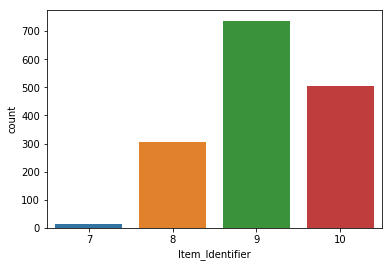

In [63]:
sns.countplot(bmart['Item_Identifier'].value_counts())

In [117]:
bmart['Item_Identifier'].str[:2].value_counts(normalize=True)

FD    0.718178
NC    0.189102
DR    0.092720
Name: Item_Identifier, dtype: float64

In [24]:
bmart['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

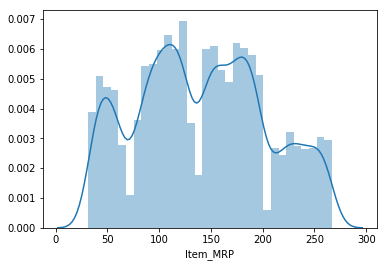

In [118]:
sns.distplot(bmart['Item_MRP'])

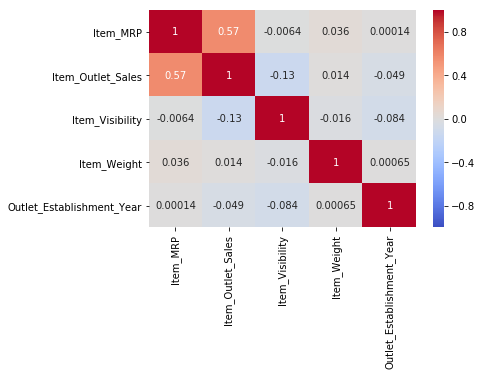

In [119]:
sns.heatmap(bmart.corr(),annot=True,vmin=-1,vmax=1,center=0,cmap='coolwarm')

In [ ]:
sns.scatterplot(bmart['Item_MRP'],bmart['Item_Outlet_Sales'])

In [ ]:
sns.scatterplot(bmart['Item_Identifier'].str[:2],bmart['Item_MRP'])

In [ ]:
sns.scatterplot(bmart['Item_MRP'],bmart['Item_Type'])

In [ ]:
sns.boxplot(y=bmart['Outlet_Type'],x=bmart['Item_MRP'])

In [ ]:
sns.pairplot(bmart)

In [ ]:
sns.scatterplot(bmart['Item_MRP'],bmart['Outlet_Identifier'])

In [ ]:
plt.plot(bmart['Item_Outlet_Sales'])

In [ ]:
sns.boxplot(bmart['Item_Outlet_Sales'])

In [ ]:
sns.distplot(train['Item_Outlet_Sales'])

In [66]:
# Item Type
bmart['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [ ]:
sns.boxplot(y=bmart['Item_Type'],x=bmart['Item_MRP'])

In [ ]:
# Item_Visibility
sns.distplot(bmart['Item_Visibility'])

In [67]:
bmart['Item_Visibility'].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [ ]:
sns.boxplot(bmart['Item_Visibility'])

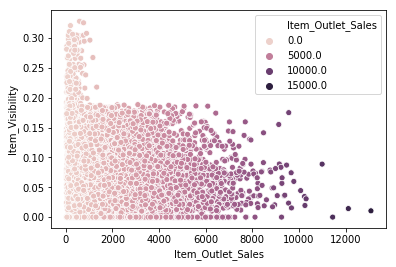

In [120]:
sns.scatterplot(x='Item_Outlet_Sales',y='Item_Visibility',data=bmart,hue='Item_Outlet_Sales')

In [12]:
m3s=np.mean(bmart['Item_Visibility'])+3*np.std(bmart['Item_Visibility'])

In [13]:
print(bmart[bmart['Item_Visibility']>m3s]['Item_Visibility'].count())
print(bmart[bmart['Item_Visibility']>m3s]['Item_Visibility'].count()/bmart.shape[0])

173
0.01217966769923965


In [14]:
p99=np.percentile(bmart['Item_Visibility'],99)

In [15]:
print(bmart[bmart['Item_Visibility']>np.percentile(bmart['Item_Visibility'],99)]['Item_Visibility'].count())
print(bmart[bmart['Item_Visibility']>np.percentile(bmart['Item_Visibility'],99)]['Item_Visibility'].count()/bmart.shape[0])

143
0.010067586595325261


In [73]:
bmart['Item_Visibility'].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [16]:
bmart.loc[(bmart.Item_Visibility>p99),'Item_Visibility']=p99

In [17]:
bmart['Item_Visibility'].describe()

count    14204.000000
mean         0.065558
std          0.049957
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.230385
Name: Item_Visibility, dtype: float64

In [18]:
bmart[bmart['Item_Visibility']>p99].count()

Item_Fat_Content             0
Item_Identifier              0
Item_MRP                     0
Item_Outlet_Sales            0
Item_Type                    0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
dtype: int64

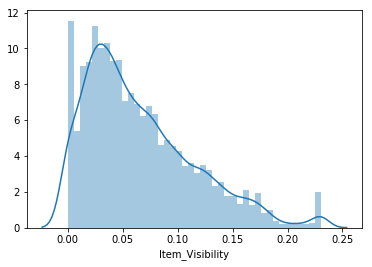

In [19]:
# sns.distplot(np.sqrt(bmart['Item_Visibility']))
sns.distplot(bmart['Item_Visibility'])
plt.show()

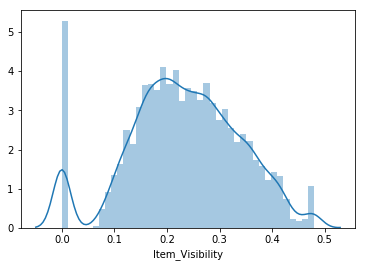

In [32]:
sns.distplot(np.sqrt(bmart['Item_Visibility']))

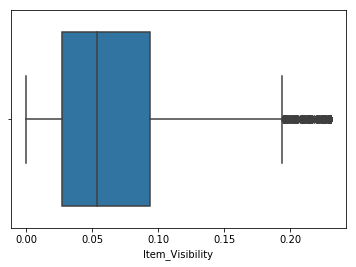

In [21]:
sns.boxplot(bmart['Item_Visibility'])

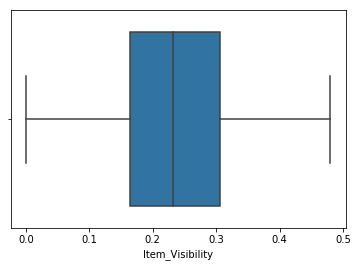

In [22]:
sns.boxplot(np.sqrt(bmart['Item_Visibility']))

In [28]:
bmart['Item_Visibility_SQRT']=np.sqrt(bmart['Item_Visibility'])

In [24]:
#Replacing 0 Item visitbility to mean
mean0=np.mean(bmart[bmart['Item_Visibility_SQRT']>0]['Item_Visibility_SQRT'])
print(mean0)

0.24844219377236626


In [31]:
np.mean(bmart['Item_Visibility_SQRT'])

0.24844219377237026

In [30]:
bmart['Item_Visibility_SQRT']=bmart['Item_Visibility_SQRT'].replace(0,mean0)

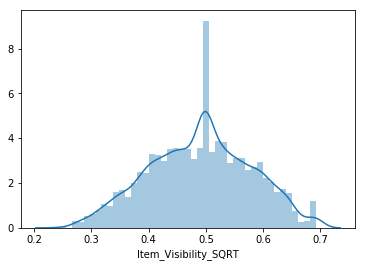

In [33]:
sns.distplot(np.sqrt(bmart['Item_Visibility_SQRT']))

In [145]:
bmart.head(20)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Visibility_SQRT
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1,0.126678
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,0.138846
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,0.129461
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store,0.000000
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,0.000000
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,0.000000
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,0.112876
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,0.357029
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1,0.129179
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1,0.307327


In [142]:
bmart.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
Item_Visibility_SQRT            0
dtype: int64

In [40]:
# t1=bmart[["Item_Visibility","Item_Visibility_SQRT"]]
# t1.to_csv("test.csv")
os.getcwd()

'D:\\Varun\\Analytics Practice\\Practice Project 3_Big Mart_Advanced Regression\\Data'

In [ ]:
bmart['Item_Weight'].isnull().sum()

In [ ]:
sns.boxplot(bmart['Item_Weight'])

In [ ]:
sns.boxplot(x=bmart['Item_Weight'],y=bmart['Item_Type'])

In [ ]:
sns.barplot(x=bmart['Item_Fat_Content'],y=bmart['Item_Weight'])

In [ ]:
sns.barplot(x=bmart['Item_Identifier'].str[:2],y=bmart['Item_Weight'])

In [ ]:
sns.barplot(x=bmart['Outlet_Location_Type'],y=bmart['Item_Weight'])

In [ ]:
sns.barplot(x=bmart['Outlet_Size'],y=bmart['Item_Weight'])

In [ ]:
sns.barplot(y=bmart['Outlet_Type'],x=bmart['Item_Weight'])

In [ ]:
sns.barplot(y=bmart['Item_Type'],x=bmart['Item_Weight'])

In [ ]:
pd.crosstab(bmart['Item_Type'],bmart['Item_Weight'].isnull())

In [34]:
bmart['Item_Weight']=bmart['Item_Weight'].fillna(bmart['Item_Weight'].groupby(bmart['Item_Type']).transform('mean'))

In [84]:
# iw=pd.DataFrame(Item_Weight)

NameError: name 'Item_Weight' is not defined

In [ ]:
biw=pd.DataFrame(bmart['Item_Weight'])

In [ ]:
bw=pd.concat([iw,biw],axis=1)

In [ ]:
bw.head(10)

In [35]:
bmart['Item_Weight'].isnull().sum()

0

In [ ]:
sns.distplot(bmart['Item_Weight'])

In [ ]:
bmart['Outlet_Establishment_Year'].describe()

In [36]:
bmart['Tenure']=2020-bmart['Outlet_Establishment_Year']

In [ ]:
bmart['Tenure'].describe()

In [ ]:
sns.distplot(bmart['Tenure'])

In [ ]:
bmart['Outlet_Identifier'].value_counts()

In [ ]:
bmart['Outlet_Location_Type'].value_counts()

In [ ]:
pd.crosstab(bmart['Outlet_Location_Type'],bmart['Outlet_Identifier'])

In [ ]:
bmart['Outlet_Size'].value_counts()

In [ ]:
bmart['Outlet_Size'].isnull().sum()

In [ ]:
sns.boxplot(bmart['Outlet_Size'],bmart['Item_Outlet_Sales'])

In [ ]:
sns.violinplot(bmart['Outlet_Size'],bmart['Item_Outlet_Sales'])

In [ ]:
sns.violinplot(bmart['Outlet_Size'].fillna("MISSING"),bmart['Item_Outlet_Sales'])

In [ ]:
bmart['Outlet_Size'].value_counts()

In [37]:
bmart['Outlet_Size']=bmart['Outlet_Size'].fillna("Small")

In [ ]:
bmart['Outlet_Size'].value_counts()

In [ ]:
sns.countplot(bmart['Outlet_Size'])

In [ ]:
sns.countplot(bmart['Outlet_Type'])

In [ ]:
bmart['Outlet_Type'].value_counts()

In [38]:
bmart.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
Item_Visibility_SQRT            0
Tenure                          0
dtype: int64

In [ ]:
print(bmart.shape)
print(train_cl.shape)
print(test_cl.shape)

In [ ]:
bmart.head(2)

In [39]:
bmart['Item_Identifier_1']=bmart['Item_Identifier'].str[:2]

In [ ]:
bmart.isnull().sum()

In [41]:
bmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 15 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  14204 non-null object
Outlet_Type                  14204 non-null object
Item_Visibility_SQRT         14204 non-null float64
Tenure                       14204 non-null int64
Item_Identifier_1            14204 non-null object
dtypes: float64(5), int64(2), object(8)
memory usage: 2.0+ MB


In [43]:
bmart.head(5)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Visibility_SQRT,Tenure,Item_Identifier_1
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,0.126678,21,FD
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,0.138846,11,DR
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,0.129461,21,FD
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Small,Grocery Store,0.248442,22,FD
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,0.248442,33,NC


In [40]:
train_cl=bmart[bmart['Item_Outlet_Sales'].notnull()]
test_cl=bmart[bmart['Item_Outlet_Sales'].isnull()]

In [44]:
train_cl.drop(['Item_Identifier','Item_Visibility','Outlet_Establishment_Year'],axis=1,inplace=True)

In [45]:
train_cl.isnull().sum()

Item_Fat_Content        0
Item_MRP                0
Item_Outlet_Sales       0
Item_Type               0
Item_Weight             0
Outlet_Identifier       0
Outlet_Location_Type    0
Outlet_Size             0
Outlet_Type             0
Item_Visibility_SQRT    0
Tenure                  0
Item_Identifier_1       0
dtype: int64

In [ ]:
train_cl.info()

In [ ]:
test_cl.info()

In [46]:
test_cl.drop(['Item_Identifier','Item_Visibility','Outlet_Establishment_Year'],axis=1,inplace=True)

In [47]:
print(train_cl.shape)
print(test_cl.shape)

(8523, 12)
(5681, 12)


In [48]:
train_cl=pd.get_dummies(train_cl,drop_first=True)
test_cl=pd.get_dummies(test_cl,drop_first=True)

In [49]:
print(train_cl.shape)
print(test_cl.shape)

(8523, 39)
(5681, 39)


## Model Building

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics

In [51]:
train_Y=train_cl['Item_Outlet_Sales']
train_X=train_cl.drop('Item_Outlet_Sales',axis=1)

In [52]:
train_X.head()

,Item_MRP,Item_Weight,Item_Visibility_SQRT,Tenure,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_1_FD,Item_Identifier_1_NC
0,249.8092,9.30,0.126678,21,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0
1,48.2692,5.92,0.138846,11,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,141.6180,17.50,0.129461,21,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
3,182.0950,19.20,0.248442,22,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,53.8614,8.93,0.248442,33,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [53]:
reg=LinearRegression()
reg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
print(reg.intercept_)
print(reg.coef_)

-1134.128700882361
[ 1.55707379e+01 -3.27546806e-01 -1.37884355e+02  1.75929822e+01
  4.21898827e+01  5.44900758e+00  6.01521583e+00  2.48029728e+01
 -5.09095876e+01 -2.82184332e+01  2.96147081e+01 -4.62157178e+01
 -3.78710014e+00 -3.34235617e+01 -1.36349547e+00 -1.53722413e+01
  1.84294436e+02 -1.17580240e+01 -7.38900002e+01  2.14684539e+01
  1.08928462e+02  3.08982754e+02  2.43957322e+02 -5.08812488e+02
  8.96402971e+02  2.95681626e+02  4.67675350e+01  6.80411969e+02
 -5.25826874e+02  6.51431915e+02 -2.97204523e+02  6.14533419e+02
 -7.23461881e+02  9.14945472e+02  2.43957322e+02  8.96402971e+02
 -4.69210844e+01 -5.25829031e+01]


In [ ]:
# import statsmodels.api as sm

In [ ]:
# model=sm.OLS(train_Y,train_X).fit()
# model.summary()

In [ ]:
# pd.DataFrame(reg.coef_,train_X.columns)

In [98]:
# model.params

NameError: name 'model' is not defined

In [55]:
test_cl.drop('Item_Outlet_Sales',axis=1,inplace=True)

In [56]:
# m_ols=model.predict(test_cl)
m_lm=reg.predict(test_cl)

In [ ]:
# x=pd.concat([pd.DataFrame(m_ols),pd.DataFrame(m_lm)],axis=1)

In [ ]:
# x.to_csv("compare.csv")

In [57]:
predicted=pd.concat([test_cl,pd.DataFrame(m_lm)],axis=1)

In [58]:
predicted.to_csv("Prediction1_Basic Regression.csv")

In [ ]:
# test=bmart[bmart['Item_Outlet_Sales'].isnull()][['Item_Identifier','Outlet_Identifier']]

In [ ]:
# test=pd.concat([test,pd.DataFrame(m_lm)],axis=1)

In [61]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [62]:
test.shape

(5681, 11)

In [63]:
pd.DataFrame(m_lm).shape

(5681, 1)

In [64]:
test=pd.concat([test,pd.DataFrame(m_lm)],axis=1)

In [65]:
test.to_csv("Prediction2.csv")

## Improving model further

In [67]:
# Copies of data. We will further create copy of these data to use further
# test_cl - original clean test data used for prediction
# train_Y - Train Data dependent variable
# train_X - Train Data all independent variables
# test - for creating sample file after prediction
# test1 - copy of test...use for uploading
test1=test.copy()

In [68]:
test1=test1.iloc[:,:-1]

In [70]:
print(test.shape)
print(test1.shape)

(5681, 12)
(5681, 11)


In [71]:
test_cl.shape

(5681, 38)

### Cross Validating Magnitude of each variable

In [73]:
reg.coef_

array([ 1.55707379e+01, -3.27546806e-01, -1.37884355e+02,  1.75929822e+01,
        4.21898827e+01,  5.44900758e+00,  6.01521583e+00,  2.48029728e+01,
       -5.09095876e+01, -2.82184332e+01,  2.96147081e+01, -4.62157178e+01,
       -3.78710014e+00, -3.34235617e+01, -1.36349547e+00, -1.53722413e+01,
        1.84294436e+02, -1.17580240e+01, -7.38900002e+01,  2.14684539e+01,
        1.08928462e+02,  3.08982754e+02,  2.43957322e+02, -5.08812488e+02,
        8.96402971e+02,  2.95681626e+02,  4.67675350e+01,  6.80411969e+02,
       -5.25826874e+02,  6.51431915e+02, -2.97204523e+02,  6.14533419e+02,
       -7.23461881e+02,  9.14945472e+02,  2.43957322e+02,  8.96402971e+02,
       -4.69210844e+01, -5.25829031e+01])

In [74]:
predictor=train_X.columns

In [83]:
coefficient=pd.Series(reg.coef_,predictor).sort_values()

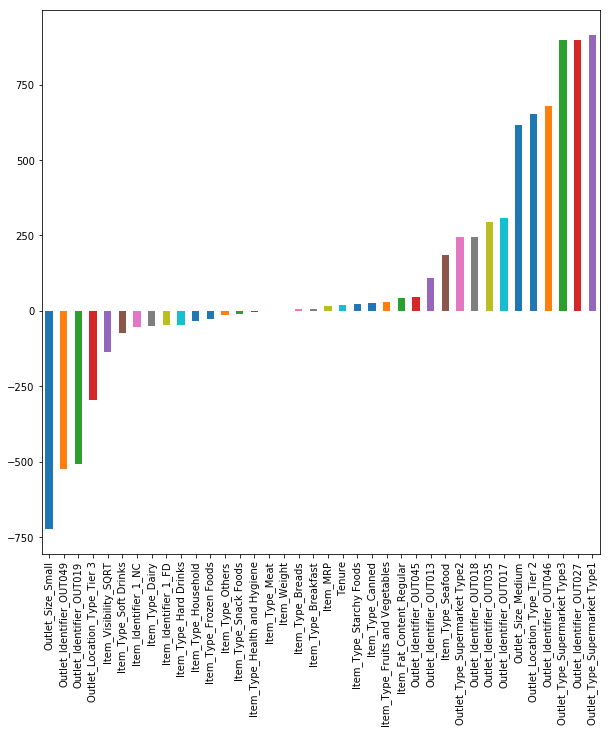

In [87]:
plt.figure(figsize=(10,10))
coefficient.plot(kind="bar")

In [88]:
coefficient

Outlet_Size_Small                 -723.461881
Outlet_Identifier_OUT049          -525.826874
Outlet_Identifier_OUT019          -508.812488
Outlet_Location_Type_Tier 3       -297.204523
Item_Visibility_SQRT              -137.884355
Item_Type_Soft Drinks              -73.890000
Item_Identifier_1_NC               -52.582903
Item_Type_Dairy                    -50.909588
Item_Identifier_1_FD               -46.921084
Item_Type_Hard Drinks              -46.215718
Item_Type_Household                -33.423562
Item_Type_Frozen Foods             -28.218433
Item_Type_Others                   -15.372241
Item_Type_Snack Foods              -11.758024
Item_Type_Health and Hygiene        -3.787100
Item_Type_Meat                      -1.363495
Item_Weight                         -0.327547
Item_Type_Breads                     5.449008
Item_Type_Breakfast                  6.015216
Item_MRP                            15.570738
Tenure                              17.592982
Item_Type_Starchy Foods           

In [90]:
reg.score(train_X,train_Y)

0.5637445970865648

### Trying Lasso/Ridge/Elastic Net Regression

#### RIDGE REGRESSION

In [149]:
# Ridge Regression
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [98]:
ridge05=Ridge(alpha=0.0000001,normalize=True)
ridge05.fit(train_X,train_Y)
pred_rid05=ridge05.predict(test_cl)
ridge05.score(train_X,train_Y)

0.5637445970865558

In [171]:
from sklearn.metrics import *

In [120]:
# Grid Search CV for hyperparameter tuning
model_parameter={'alpha':[0.001,0.01,0.05,1,10,15,20,25,100],
                'normalize':[True,False]}

In [121]:
reg_R=Ridge()
gscv=GridSearchCV(estimator=reg_R,
                 param_grid=model_parameter,
                 cv=5,
                 verbose=1,
                 n_jobs=-1)

gscv.fit(train_X,train_Y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.001, 0.01, 0.05, 1, 10, 15, 20, 25, 100], 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [122]:
gscv.best_params_

{'alpha': 20, 'normalize': False}

In [123]:
gscv.best_score_

0.5590058541740852

In [124]:
reg_R_final=Ridge(**gscv.best_params_)
reg_R_final.fit(train_X,train_Y)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [125]:
model_ridge=reg_R_final.predict(test_cl)

In [126]:
pred_ridge=pd.concat([test1,pd.DataFrame({'Item_Outlet_Sales':model_ridge})],axis=1)

In [134]:
pred_ridge=pred_ridge[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]

In [137]:
pred_ridge.to_csv("Prediction3_Ridge_Regression.csv",index=False)

#### LASSO REGRESSION

In [156]:
# Grid Search CV for hyperparameter tuning
model_parameter_L={'alpha':[0.001,0.01,0.02,0.03,0.05,0.1,1,1.5,1.75,2,10,15,20,25,100],
                'normalize':[True,False]}

In [173]:
reg_L=Lasso()
gscv_l=GridSearchCV(estimator=reg_L,
                 param_grid=model_parameter_L,
                 cv=5,
                 verbose=1,
                 n_jobs=-1,
                 scoring=metrics.mean_squared_error) #Added extra

gscv_l.fit(train_X,train_Y)

ValueError: scoring value <function mean_squared_error at 0x000000B22D912A60> looks like it is a metric function rather than a scorer. A scorer should require an estimator as its first parameter. Please use `make_scorer` to convert a metric to a scorer.

In [158]:
gscv_l.best_params_

{'alpha': 2, 'normalize': False}

In [159]:
gscv_l.best_score_

0.5603272016809726

In [166]:
reg_L_final=Lasso(**gscv_l.best_params_)
reg_L_final.fit(train_X,train_Y)

Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [167]:
lasso_pred=reg_L_final.predict(test_cl)
lasso_pred1=pd.concat([test1,pd.DataFrame({'Item_Outlet_Sales':lasso_pred})],axis=1)
lasso_pred1=lasso_pred1[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
lasso_pred1.to_csv("Prediction4_Lasso_Regression.csv",index=False)

### ELASTIC NET REGRESSION

In [162]:
model_parameter_EN={'alpha':[0.001,0.01,0.02,0.03,0.05,0.1,1,1.5,1.75,2,10,15,20,25,100],
                'normalize':[True,False],
                  'l1_ratio':[0.25,0.5,0.75]}

In [163]:
reg_EN=ElasticNet()
gscv_en=GridSearchCV(estimator=reg_EN,
                 param_grid=model_parameter_EN,
                 cv=5,
                 verbose=1,
                 n_jobs=-1)

gscv_en.fit(train_X,train_Y)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   11.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.001, 0.01, 0.02, 0.03, 0.05, 0.1, 1, 1.5, 1.75, 2, 10, 15, 20, 25, 100], 'normalize': [True, False], 'l1_ratio': [0.25, 0.5, 0.75]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [164]:
gscv_en.best_params_

{'alpha': 0.01, 'l1_ratio': 0.75, 'normalize': False}

In [165]:
gscv_en.best_score_

0.5590140527596087

In [168]:
reg_EN_final=ElasticNet(**gscv_en.best_params_)
reg_EN_final.fit(train_X,train_Y)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.75,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [169]:
en_pred=reg_EN_final.predict(test_cl)
en_pred1=pd.concat([test1,pd.DataFrame({'Item_Outlet_Sales':en_pred})],axis=1)
en_pred1=en_pred1[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
en_pred1.to_csv("Prediction5_ElasticNet.csv",index=False)